In [2]:
import numpy as np
import pandas as pd 
from pandas import Series, DataFrame

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
#from pandas.io.data import DataReader
#import pandas_datareader as pdr
import pandas_datareader.data as web

# For time stamps
from datetime import datetime
#import datetime

In [5]:
# For division
from __future__ import division

# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# Set up End and Start times for data grab
end = datetime.now()

In [6]:
start = datetime(end.year - 1,end.month,end.day)

In [7]:
#For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = web.DataReader(stock, 'yahoo', start, end)

In [8]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,152.451594,153.429920,151.488367,152.563147,151.589536,2.700619e+07
std,13.911849,14.004127,13.710178,13.854217,14.420668,1.130048e+07
min,118.339996,120.089996,118.220001,119.779999,117.884300,1.402670e+07
25%,143.550003,144.169999,142.614998,143.644996,141.994415,2.034815e+07
50%,153.630005,154.169998,152.630005,153.389999,152.461060,2.397410e+07
75%,160.510002,162.125000,159.745002,161.159997,160.527916,2.949975e+07
max,176.179993,177.360001,175.649994,177.089996,177.089996,1.119850e+08


In [9]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2017-01-17 to 2018-01-12
Data columns (total 6 columns):
Open         251 non-null float64
High         251 non-null float64
Low          251 non-null float64
Close        251 non-null float64
Adj Close    251 non-null float64
Volume       251 non-null int64
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


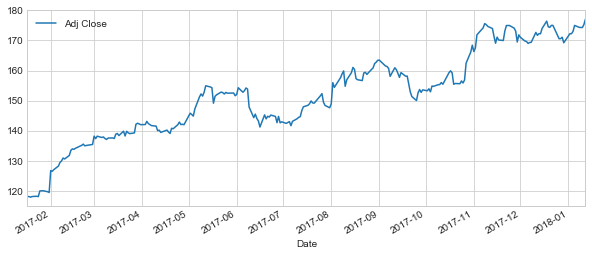

In [10]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

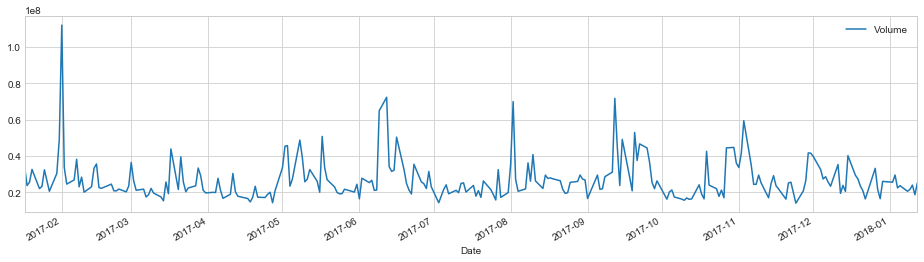

In [11]:
AAPL['Volume'].plot(legend=True,figsize=(16,4))

In [12]:
ma_day = [10,20,50]
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'],ma)

C:\Anaconda2\envs\mypython27\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  after removing the cwd from sys.path.
C:\Anaconda2\envs\mypython27\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  after removing the cwd from sys.path.
C:\Anaconda2\envs\mypython27\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
  after removing the cwd from sys.path.


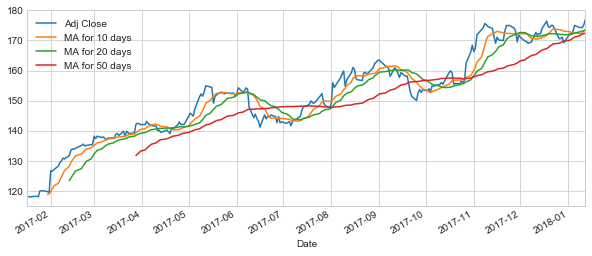

In [13]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

In [14]:
ma_day = [10,20,50]
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma,center=False).mean()

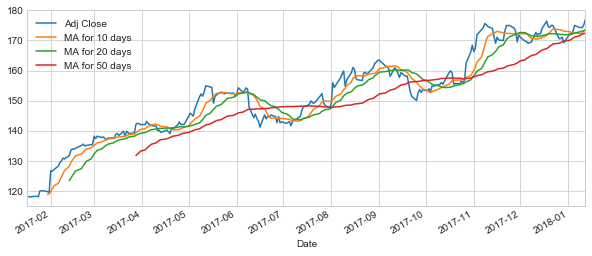

In [15]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

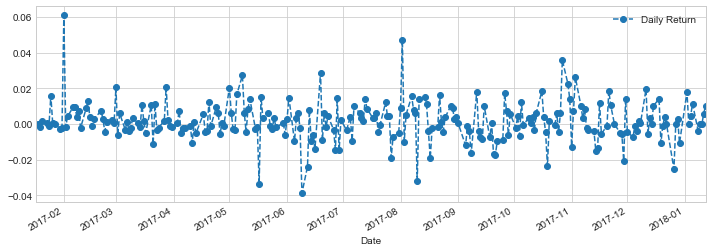

In [16]:
# We'll use pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

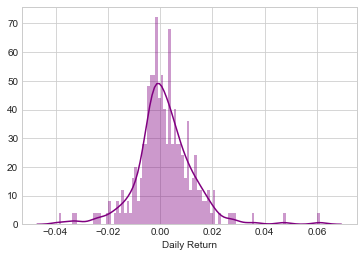

In [17]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color = 'purple')

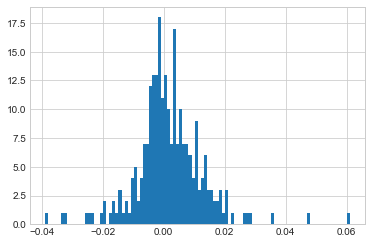

In [18]:
AAPL['Daily Return'].hist(bins=100)

In [19]:
#closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']
closing_df = web.DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']
# globals()[stock] = web.DataReader(stock, 'yahoo', start, end)

In [20]:
closing_df.describe()

,AAPL,AMZN,GOOG,MSFT
count,251.000000,251.000000,251.000000,251.000000
mean,151.589536,984.333585,932.429841,72.227256
std,14.420668,112.511289,80.280255,7.730558
min,117.884300,807.479980,795.695007,60.939304
25%,141.994415,903.070007,846.410003,64.674339
50%,152.461060,974.190002,932.070007,71.646545
75%,160.527916,1010.805023,982.174988,76.918705
max,177.089996,1305.199951,1122.260010,89.599998


In [21]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-01-12,177.089996,1305.199951,1122.260010,89.599998
2018-01-11,175.279999,1276.680054,1105.520020,88.080002
2018-01-10,174.289993,1254.329956,1102.609985,87.820000
2018-01-09,174.330002,1252.699951,1106.260010,88.220001
2018-01-08,174.350006,1246.869995,1106.939941,88.279999


In [22]:
tech_rets = closing_df.pct_change()

In [23]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-01-12,NaN,NaN,NaN,NaN
2018-01-11,-0.010221,-0.021851,-0.014916,-0.016964
2018-01-10,-0.005648,-0.017506,-0.002632,-0.002952
2018-01-09,0.000230,-0.001300,0.003310,0.004555
2018-01-08,0.000115,-0.004654,0.000615,0.000680


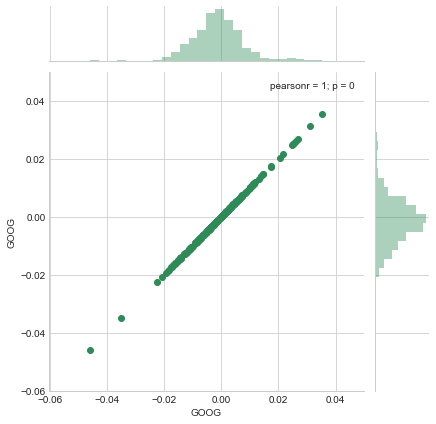

In [24]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

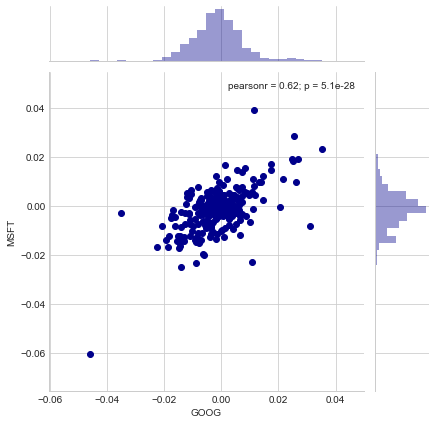

In [28]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter',color='darkblue')

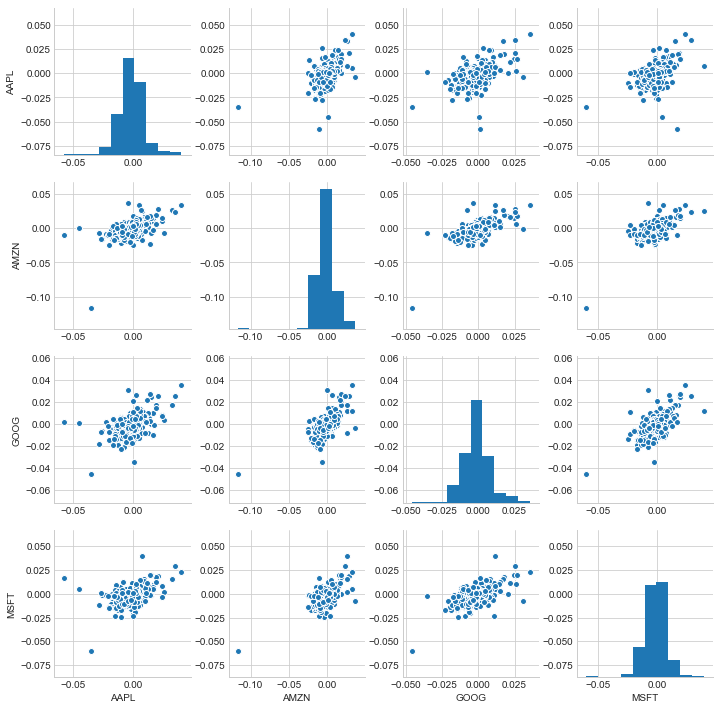

In [29]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_rets.dropna())

C:\Anaconda2\envs\mypython27\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'color', 'label'
  s)


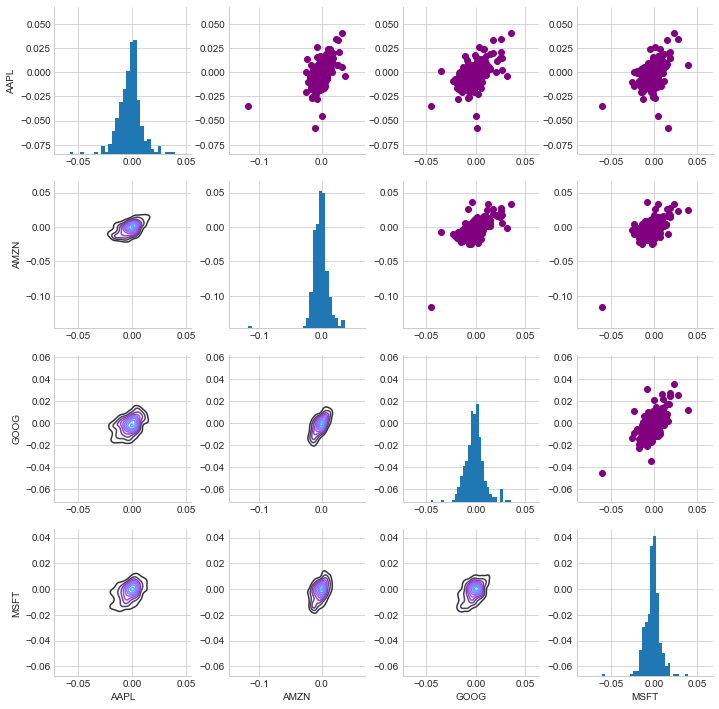

In [31]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)


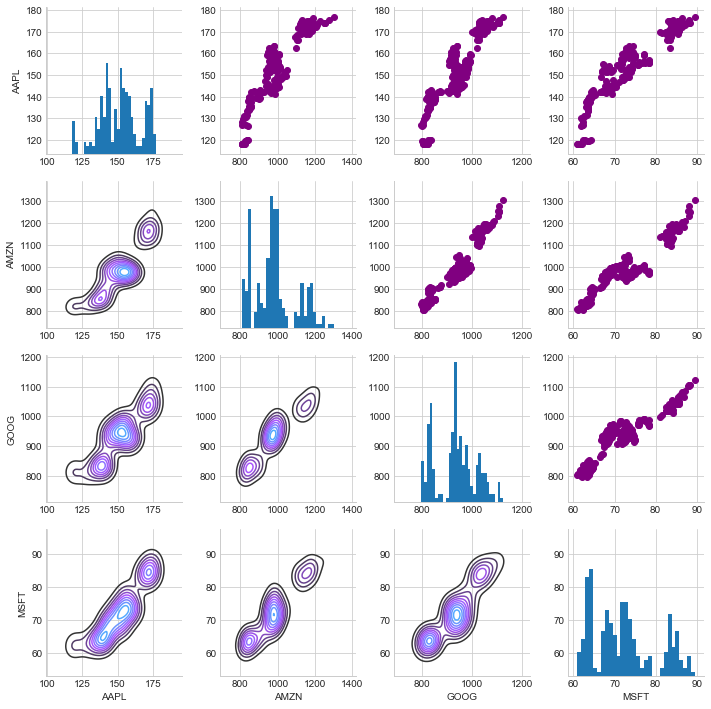

In [32]:
returns_fig = sns.PairGrid(closing_df.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

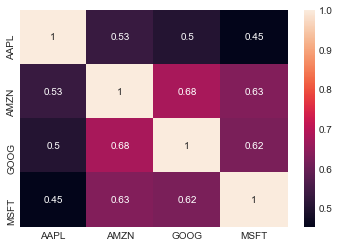

In [35]:
#sns.corrplot(tech_rets.dropna(),annot=True) #depricated
sns.heatmap(tech_rets.dropna().corr(),annot=True)

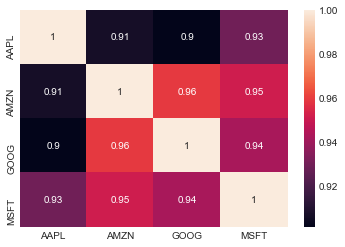

In [36]:
sns.heatmap(closing_df.corr(),annot=True)

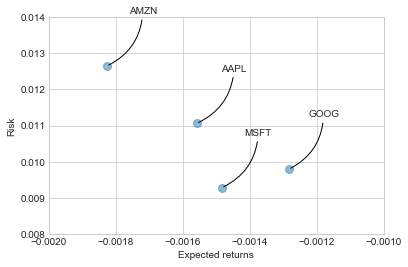

In [40]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.008,0.014])
plt.xlim([-0.002,-0.001])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

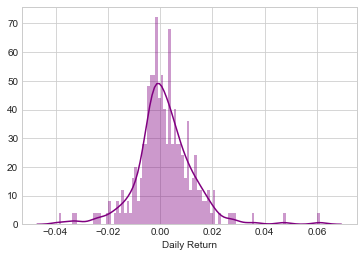

In [41]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [42]:
# The 0.05 empirical quantile of daily returns
rets['AAPL'].quantile(0.05)

-0.017938679806266705

In [43]:
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for AAPL
mu = rets.mean()['GOOG']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG']

In [44]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in xrange(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

Text(0.5,1,u'Monte Carlo Analysis for Google')

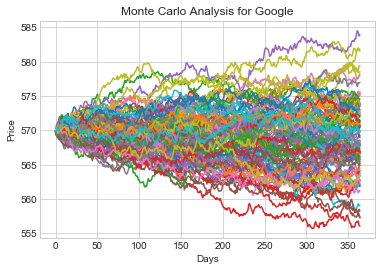

In [45]:
# Get start price from GOOG.head()
start_price = 569.85

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [46]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in xrange(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

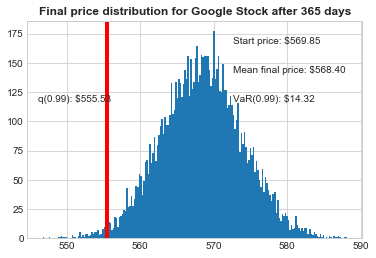

In [47]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');